# Project: Investigate a TMDb Movie Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue, columns like ‘cast’, ‘genres’, ‘popularity’, ‘budget’ etc., and some of this columns contain multiple values separated by pipe (|) characters.

> I want to explore **questions** like

>**1i. What kind of properities are associated with movies which high runtime?**
>> 1ii. Is vote count corrolated with popularity?

>**2i. Which year did the movie industry have the highest revenue?**
>> 2ii. Top 10 highest grossing movies

>**3i. Which genre is most popular?**
>> 3ii. Which genre is most popular each year?

In [4]:
# packages and libraries needed for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## General Properties

In [5]:
# load data
df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# check number of columns and rows
df_tmdb.shape

(10866, 21)

In [7]:
# get an overall look of our dataset
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### from the above we can see they're lots of zero values in the budget, revenue and runtime column respectively, we are going to look further into them in the exploration part of this analysis.

<a id='wrangling'></a>
## Data Wrangling

> I will be loading the data here to check for cleanliness, and then trim and clean the dataset for analysis.

### Observe the dataset for duplicates, wrong datatype, null values.

In [8]:
# observe data for cleaning
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# check for duplicates
df_tmdb.duplicated().sum()

1

In [10]:
# check for wrong datatypes
df_tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [11]:
# check for null values and columns
df_tmdb.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

#### drop duplicates

In [12]:
# from the information above there is only 1 duplicate and dropping it won't show any significant change in our dataset
df_tmdb[df_tmdb.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [13]:
df_tmdb.drop_duplicates(inplace=True)

In [14]:
## verify drop
df_tmdb.duplicated().sum()

0

#### fix wrong datatype

In [15]:
# from the information above I noticed the release date shows as an object datatype so i'm going
# to change it to datetime datatype
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])
# verify change
df_tmdb.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

#### drop null values and columns

##### on checking for null values above we have some columns that are null and also somewhich we don't need for our analysis, so i will be dropping them, although i will be leaving some columns (budget, revenue, runtime) although they're null but that's because they're required for this analysis, we will be fixing them further in the exploration part of this analysis.

In [16]:
# drop columns
df_tmdb.drop(columns=['id', 'imdb_id', 'homepage', 'overview', 'tagline', 'keywords', 'budget_adj', 'revenue_adj',
                      'production_companies', 'cast', 'director'], inplace=True)

In [17]:
# we still have genres to be null, but we will not drop the column, only the null values, cause we need it for our analysis.
df_tmdb.isna().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [18]:
# drop genre null values.
df_tmdb.dropna(inplace=True)

In [19]:
#verify removal
df_tmdb.isna().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [20]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10842 non-null  float64       
 1   budget          10842 non-null  int64         
 2   revenue         10842 non-null  int64         
 3   original_title  10842 non-null  object        
 4   runtime         10842 non-null  int64         
 5   genres          10842 non-null  object        
 6   release_date    10842 non-null  datetime64[ns]
 7   vote_count      10842 non-null  int64         
 8   vote_average    10842 non-null  float64       
 9   release_year    10842 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 931.7+ KB


### Now we are left with these columns ['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres',  'release_date', 'vote_count', 'vote_average', 'release_year'] so let's proceed

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we can now move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions stated in the Introduction section.

In [21]:
    df_tmdb.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [22]:
# change format of float value for clearer understanding of our figures
pd.set_option('float_format', lambda x: "%.6f" % x)

In [23]:
df_tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000
mean,0.647461,14655309.268493,39911384.050452,102.138443,217.823649,5.974064,2001.314794
std,1.001032,30939713.605429,117117936.317638,31.294612,576.180993,0.934257,12.813617
min,0.000065,0.000000,0.000000,0.000000,10.000000,1.500000,1960.000000
25%,0.208210,0.000000,0.000000,90.000000,17.000000,5.400000,1995.000000
50%,0.384532,0.000000,0.000000,99.000000,38.000000,6.000000,2006.000000
75%,0.715393,15000000.000000,24141183.500000,111.000000,146.000000,6.600000,2011.000000
max,32.985763,425000000.000000,2781505847.000000,900.000000,9767.000000,9.200000,2015.000000


In [24]:
# check the number of zeros in the columns below
df_tmdb[['budget', 'revenue', 'runtime']].apply(lambda x: x == 0).sum()

budget     5674
revenue    5993
runtime      30
dtype: int64

#### from the above we can see they're alot of zero values, for runtime it can be negligible or dropped but budget and revenue seems to have a lot of 0 values which doesn't make any sense if we just ignore or drop it.

> For the revenue I wouldn't want to fill the whole column cause it have 0s, it's possible some movies didn't generate any revenue so what I will do is fill only the revenue columns that have 0 value for the budget.

In [25]:
# since revenue and budget have a lot of zero values, i will be using release year to get their mean to  make the distribution
# much better
year_mean = df_tmdb.groupby('release_year')[['budget', 'revenue', 'runtime']].mean()
year_mean.head()

,budget,revenue,runtime
release_year,,,
1960,689279.625000,4531406.250000,110.656250
1961,1488290.322581,10894199.612903,119.419355
1962,1710066.437500,6736870.187500,124.343750
1963,2156808.823529,5511911.441176,111.323529
1964,940075.261905,8118613.857143,109.214286


In [26]:
# check the mean value for revenue
year_mean['revenue'].mean()

30809799.522263877

In [27]:
# condition replace revenue mean only where is budget is equal 0
zero_value_condition = (df_tmdb['budget'] == 0 )
df_tmdb.loc[zero_value_condition, 'revenue'] = year_mean['revenue'].mean()

In [28]:
# let's drop zero revenue values
df_tmdb.drop(df_tmdb[df_tmdb.revenue == 0].index, inplace=True)

In [29]:
df_tmdb.revenue.describe()

count         9528.000000
mean      61905858.619998
std      118440946.386068
min              2.000000
25%       30809799.522264
50%       30809799.522264
75%       30809799.522264
max     2781505847.000000
Name: revenue, dtype: float64

#### now we work on the  budget column and replace it with mean

In [30]:
# check the mean value for budget
year_mean['budget'].mean()

9846006.554688433

In [31]:
# replace budget column that have 0 values with budget mean
budget_column = df_tmdb['budget']
budget_column.replace(to_replace = 0, value = year_mean['budget'].mean(), inplace=True)

#### finally for the runtime

In [32]:
# replace runtime column that have 0 values with runtime mean
runtime_column = df_tmdb['runtime']
runtime_column.replace(to_replace = 0, value = year_mean['runtime'].mean(), inplace=True)

### so now we can see our data is cleaner, and the lots of zero (0) values on the revenue, budget and runtimie column as seen below is now fixed, now i can proceed to answering my questions

In [33]:
df_tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000
mean,0.680378,20911974.103201,61905858.619998,102.609915,239.627414,6.020665,2001.324307
std,1.056405,30013457.429122,118440946.386068,31.145130,610.285730,0.914827,12.774505
min,0.000065,1.000000,2.000000,2.000000,10.000000,1.500000,1960.000000
25%,0.208901,9846006.554688,30809799.522264,90.000000,17.000000,5.500000,1994.000000
50%,0.393868,9846006.554688,30809799.522264,99.000000,41.000000,6.100000,2006.000000
75%,0.763665,15000000.000000,30809799.522264,112.000000,170.000000,6.600000,2011.000000
max,32.985763,425000000.000000,2781505847.000000,900.000000,9767.000000,9.200000,2015.000000


### Answering Questions

In [34]:
# get a brief look on our data
df_tmdb.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.000000,1513528810.000000,Jurassic World,124.000000,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.500000,2015
1,28.419936,150000000.000000,378436354.000000,Mad Max: Fury Road,120.000000,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.100000,2015
2,13.112507,110000000.000000,295238201.000000,Insurgent,119.000000,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.300000,2015
3,11.173104,200000000.000000,2068178225.000000,Star Wars: The Force Awakens,136.000000,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.500000,2015
4,9.335014,190000000.000000,1506249360.000000,Furious 7,137.000000,Action|Crime|Thriller,2015-04-01,2947,7.300000,2015


###  1i. What kind of properities are associated with movies with high runtime?

#### let's see how genres is associated with runtime

In [35]:
# function for expanding columns with multiple values
def expand_multiple_columns(df: pd.DataFrame, col: str, delimeter: str="|"):
    
    # copy the data frame
    df_copy = df.copy()
    
    # split the string values
    df_copy[col] = df_copy[col].str.split(delimeter)
    
    # explode all the dataset based on the splitted column
    return df_copy.explode(col)

In [36]:
# first and foremost, since genre has multiple columns let's expand it
genres_column = expand_multiple_columns(df_tmdb, 'genres')

In [62]:
genres_column

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.000000,1513528810.000000,Jurassic World,124.000000,Action,2015-06-09,5562,6.500000,2015
0,32.985763,150000000.000000,1513528810.000000,Jurassic World,124.000000,Adventure,2015-06-09,5562,6.500000,2015
0,32.985763,150000000.000000,1513528810.000000,Jurassic World,124.000000,Science Fiction,2015-06-09,5562,6.500000,2015
0,32.985763,150000000.000000,1513528810.000000,Jurassic World,124.000000,Thriller,2015-06-09,5562,6.500000,2015
1,28.419936,150000000.000000,378436354.000000,Mad Max: Fury Road,120.000000,Action,2015-05-13,6185,7.100000,2015
...,...,...,...,...,...,...,...,...,...,...
10862,0.065543,9846006.554688,30809799.522264,Grand Prix,176.000000,Drama,2066-12-21,20,5.700000,1966
10863,0.065141,9846006.554688,30809799.522264,Beregis Avtomobilya,94.000000,Mystery,2066-01-01,11,6.500000,1966
10863,0.065141,9846006.554688,30809799.522264,Beregis Avtomobilya,94.000000,Comedy,2066-01-01,11,6.500000,1966
10864,0.064317,9846006.554688,30809799.522264,"What's Up, Tiger Lily?",80.000000,Action,2066-11-02,22,5.400000,1966


In [38]:
# checking the unique values of genres
genres_column.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [39]:
# group genre
grouped_genres = genres_column.groupby('genres')

In [40]:
# create variable for to see the relation between genres and runtme
genres_runtime = grouped_genres.runtime.mean().reset_index().set_index('genres').sort_values('runtime', ascending=False)

In [41]:
# we can see genres and their associated mean runtime
genres_runtime

,runtime
genres,
History,137.228571
War,126.914530
Western,119.034965
Drama,110.761501
Crime,107.377147
Romance,107.135385
Foreign,107.052939
Music,106.905373
Mystery,106.778414


Text(0, 0.5, 'Runtime')

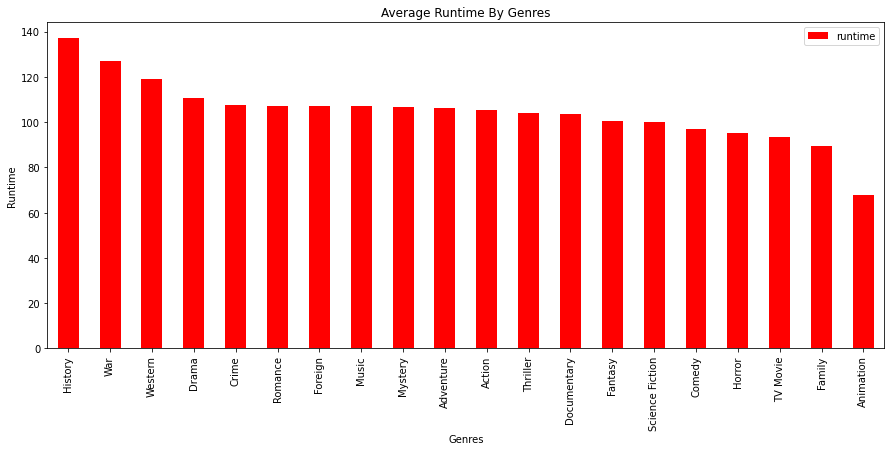

In [42]:
# let's plot a graph to show a visualization of the above
genres_runtime.plot(kind='bar', color='red', figsize=(15, 6))

plt.title('Average Runtime By Genres')
plt.xlabel('Genres')
plt.ylabel('Runtime')

#### from the above we can see the average runtime by genres, and History is the genre with the highest runtime and Animation is the genre with the lowest runtime

In [43]:
# let's create a low runtime and high runtime variable
df_tmdb.runtime.describe()

count   9528.000000
mean     102.609915
std       31.145130
min        2.000000
25%       90.000000
50%       99.000000
75%      112.000000
max      900.000000
Name: runtime, dtype: float64

In [44]:
# using 75% above for high runtime and 25% below for low runtime
high_runtime = df_tmdb.runtime >= 112.000000
low_runtime = df_tmdb.runtime <= 90.000000

In [45]:
# popularity mean with high runtime
df_tmdb.popularity[high_runtime].mean()

1.0661405602632656

In [46]:
# popularity mean with low runtime
df_tmdb.popularity[low_runtime].mean()

0.4218622123368928

##### from the above we can see popularity is associated with high movie runtime 

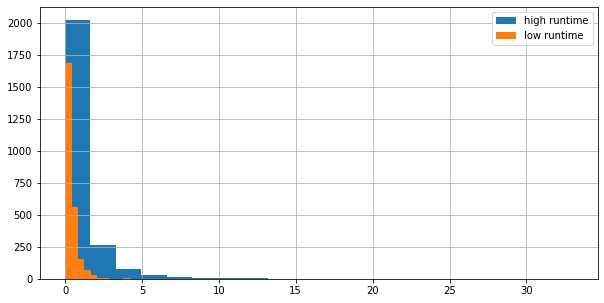

In [51]:
# let's show a distribution to visualize this
df_tmdb.popularity[high_runtime].hist(bins=20, label='high runtime', figsize=(10, 5))
df_tmdb.popularity[low_runtime].hist(bins=20, label='low runtime', figsize=(10, 5))

plt.legend()

#### from the visualization above, how popular a movie can be is associated with how high the runtime is 

### 1ii. Is vote count corrolated with popularity?

<AxesSubplot:xlabel='vote_count', ylabel='popularity'>

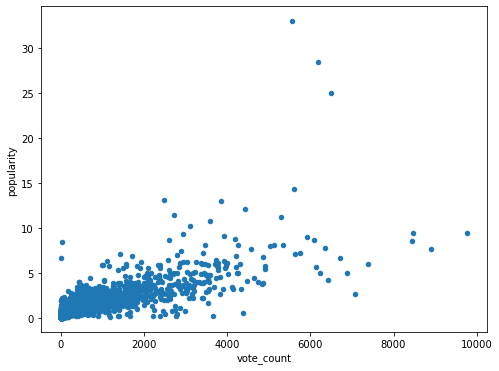

In [430]:
# scatter plot visualization
df_tmdb.plot.scatter(x='vote_count', y='popularity', figsize=(8, 6))

#### from the above we can see a positive corrolation in popularity and vote count

### 2i. Which year did the movie industry have the highest revenue?

#### to answer this question i will have to use groupby for release year and revenue 

In [52]:
# compute mean of revenue for every year
year_revenue_mean = df_tmdb.groupby('release_year')[['revenue']].mean().reset_index().set_index('release_year').sort_values(
'revenue', ascending=False)

In [55]:
year_revenue_mean.head()

,revenue
release_year,
2002,77054667.503200
1997,76807666.787302
2003,75107015.846786
2004,74930336.128268
2001,74281663.142383


In [53]:
# check for year with the most revenue
most_revenue_year = year_revenue_mean[year_revenue_mean.revenue == year_revenue_mean.revenue.max()]
most_revenue_year

,revenue
release_year,
2002,77054667.503200


#### from this result above we see 2002 had the highest total revenue in the movie industry, let's visualize this further below

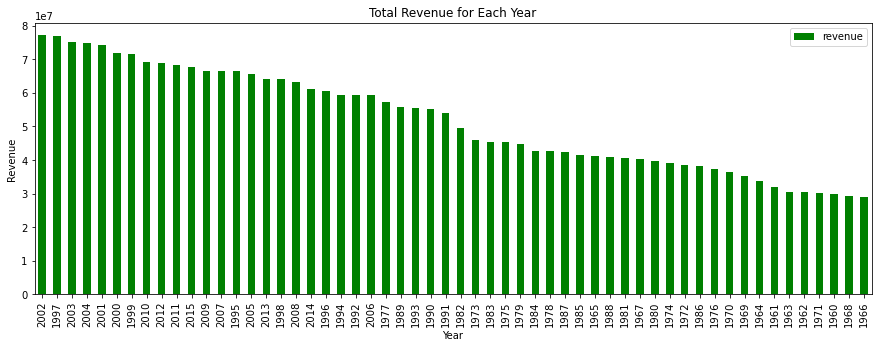

In [433]:
# let's plot a graph to show a visualization of the above
year_revenue_mean.plot(kind='bar', color='green', figsize=(15, 5))

plt.title('Total Revenue for Each Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend()

#### from the above visualization we can see the total revenue the movie industry made each year.

### 2ii. Top 10 movies with the highest revenue

In [57]:
# compute mean revenue for every movie
movie_revenue_mean = df_tmdb.groupby('original_title')[['revenue']].mean().reset_index().set_index(
    'original_title').sort_values('revenue', ascending=False)

In [58]:
# get the first 10 movies with the highest revenue
movie_revenue_mean.head(10)

,revenue
original_title,
Avatar,2781505847.000000
Star Wars: The Force Awakens,2068178225.000000
Titanic,1845034188.000000
Jurassic World,1513528810.000000
Furious 7,1506249360.000000
Avengers: Age of Ultron,1405035767.000000
Harry Potter and the Deathly Hallows: Part 2,1327817822.000000
Iron Man 3,1215439994.000000
Minions,1156730962.000000


#### from the above result we see the first 10 top revenue movie ever, let's further explore this.

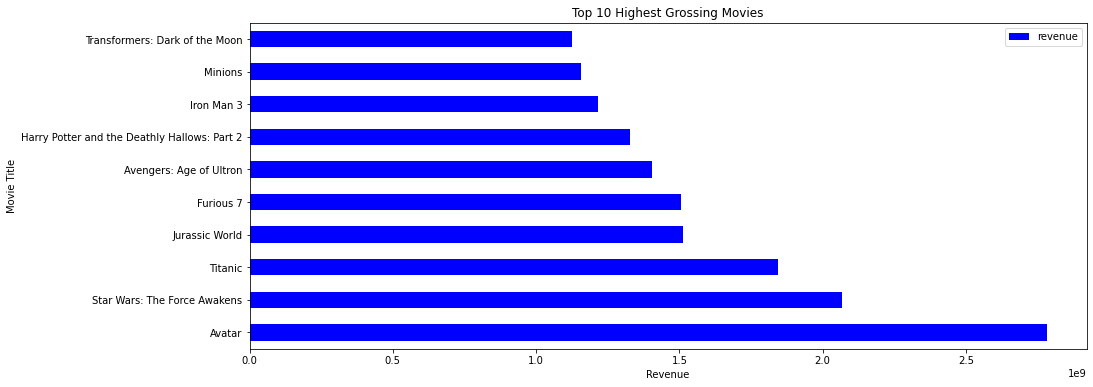

In [60]:
# visualization of top 10 movie with the highest revenue
movie_revenue_mean.head(10).plot(kind='barh', color='blue', figsize=(15, 6))

plt.title('Top 10 Highest Grossing Movies')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.legend()

#### the visualization above clearly shows top 10 highest grossing movies of all time. Note: Revenue is in millions

### 3i. Which genre is most popular?

#### let's check how genres can be influence the popularity of a movie

In [437]:
# calculate the mean and sort it so it starts from top-bottom
genre_popularity = grouped_genres.popularity.mean().reset_index().set_index('genres').sort_values('popularity', ascending=False)

In [438]:
# from this we can see the popularity of movies based on their genres
genre_popularity

,popularity
genres,
Adventure,1.239005
Science Fiction,1.098856
Fantasy,1.066987
Action,1.006687
Animation,0.876842
Family,0.816130
Thriller,0.798205
Crime,0.784683
War,0.775720


Text(0, 0.5, 'Popularity')

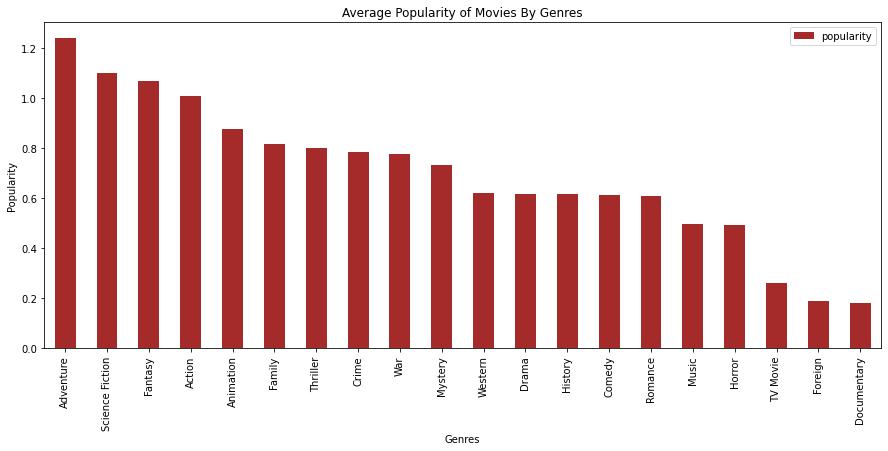

In [439]:
# let's plot a graph to show a visualization of the result above
genre_popularity.plot(kind='bar', color='brown', figsize=(15, 6))
    
plt.title('Average Popularity of Movies By Genres')
plt.xlabel('Genres')
plt.ylabel('Popularity')

#### the visualization above shows the average popularity of movies by genres. Adventure is most popular and Documentaries are the least popular

### 3ii. Which genre is most popular for each year?

#### to do this I will create a data set group using both release_year and genres column, the I will calculate the mean and get the max of each year.

In [69]:
# group genre and release_year column
genre_year_grouped = genres_column.groupby(['release_year', 'genres'])

# calculate the mean of popularity for the grouped genre and release_year column
genre_year_popularity = genre_year_grouped.popularity.mean()

# get the genre with maximum average popularity for each year
genre_year_max_mean = genre_year_popularity[genre_year_popularity.groupby(level=0).idxmax()]

In [70]:
# result of our genre, release year and the popularity
genre_year_max_mean

release_year  genres         
1960          Thriller          0.958973
1961          Animation         2.631987
1962          Adventure         0.942513
1963          Animation         2.180410
1964          War               0.930959
1965          Music             1.313676
1966          Fantasy           0.424771
1967          Animation         2.550704
1968          Mystery           1.519456
1969          Crime             1.357317
1970          Animation         1.127719
1971          Family            2.430667
1972          Crime             1.213128
1973          Animation         0.956526
1974          Crime             0.715756
1975          Fantasy           1.055039
1976          Crime             0.754765
1977          Science Fiction   1.507923
1978          War               0.697533
1979          Science Fiction   1.534858
1980          Science Fiction   1.006642
1981          Adventure         0.929726
1982          Science Fiction   1.291838
1983          Adventure    

In [71]:
# loop function to add the popular genre and along side the year.
x_labels = [f"{x[1]} - {x[0]}" for x in list(genre_year_max_mean.index)]

<AxesSubplot:title={'center':'Popularity of Genre Each Year'}, xlabel='Year and Genre', ylabel='popularity'>

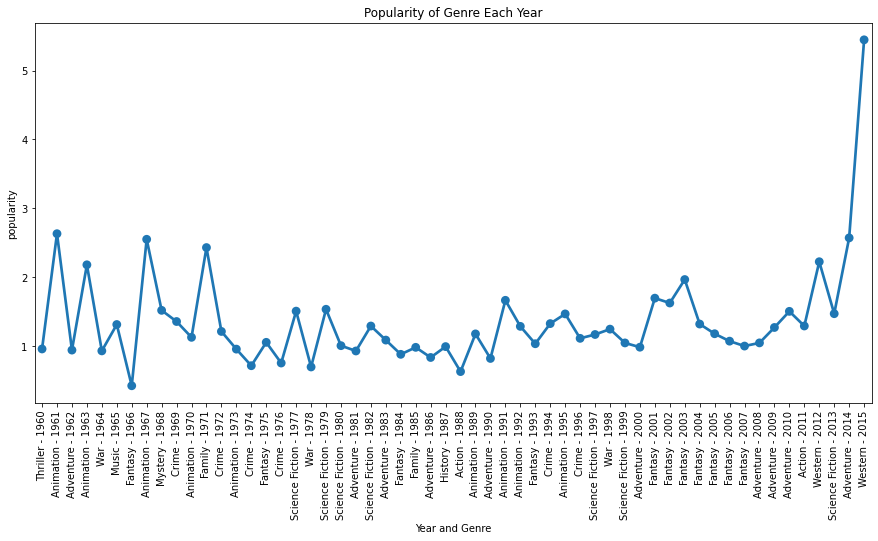

In [74]:
# let's visualize the above using line plot
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.title('Popularity of Genre Each Year')
plt.xlabel('Year and Genre')

sns.pointplot(x=x_labels, y=genre_year_max_mean, data=genre_year_max_mean)

#### a clear trend is visualized above, showing popular genres each year in the movie industry.

<a id='conclusions'></a>
## Conclusions
>> **Results:**
>> 1. For the first question section; I found out popularity of a movie is associated with high runtime movies and also the type of genre of a movie determines it's runtime. From the visualization above we see Animation is the least associated type genre with movies with high runtime. Further more I saw that vote count is corrolated with popularity. I also saw that History genre have the highest runtime in all genres.
>> 2. For the second question section; I found out 2002 was the year with the highest revenue in the movie industry, and also got the top 10 movies with the highest revenue.
>> 3. For the third question section; I checked to see how genre is associated with popularity, from my investigation Adventure the most popular genre and the least popular genre is Documentary. I also got the popular genre of Each year in the Movie industry

>> **Limitations:**
>> 1. Wrangling the dataset was the most challenging part of this analysis, the data was flawed in ways that affect the questions I want to answer based on the given data.
>> 2. It was hard to find correlations between different columns because of how categorical they are.
>> 3. Alot of zero values after clearing null values and it affected a large chunk of my data (revenue and budget most especially), so I had to fill them using the mean of every year to make the distribution evenly.